In [247]:
import pandas as pd
import numpy as np

In [248]:
saheart_ds = pd.read_csv( "../data/SAheart.data" )

In [249]:
saheart_ds.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Encode the categorical variables

In [250]:
saheart_model_df = pd.get_dummies(saheart_ds, drop_first = True)

In [251]:
saheart_model_df.head()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1


### Set the X and Y Variables

In [252]:
Y = saheart_model_df['chd']

In [253]:
X = saheart_model_df[['sbp', 'tobacco', 'ldl',
              'adiposity', 'typea',
              'obesity', 'alcohol',
              'age', 'famhist_Present' ]]

In [254]:
X[0:5]

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [255]:
Y[0:5]

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

### Normalize the numerical variables (normalize only X , not Y)

In [256]:
X_normalize = X[['sbp', 'tobacco', 'ldl',
              'adiposity', 'typea',
              'obesity', 'alcohol',
              'age']].apply( lambda rec: ( rec - rec.mean() ) / rec.std(), axis = 0 )


In [257]:
X[['sbp', 'tobacco', 'ldl','adiposity', 'typea','obesity', 'alcohol','age']] = X_normalize

X[0:5]

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,0
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,1
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1


In [258]:
X = np.array( X )

In [259]:
X[0:5]

array([[ 1.05741729,  1.8210988 ,  0.47789413, -0.29518321, -0.41801699,
        -0.17659445,  3.27418871,  0.62865426,  1.        ],
       [ 0.27678925, -0.78938174, -0.15950708,  0.41169419,  0.19313443,
         0.67064592, -0.61208112,  1.38161701,  0.        ],
       [-0.99173133, -0.77414124, -0.6085852 ,  0.8833742 , -0.11244128,
         0.73472292, -0.54059729,  0.2179473 ,  1.        ],
       [ 1.54530982,  0.84135214,  0.80625232,  1.62238239, -0.21429985,
         1.41109128,  0.2947424 ,  1.03936121,  1.        ],
       [-0.21110328,  2.16945317, -0.59892761,  0.30501996,  0.70242729,
        -0.01284211,  1.64599115,  0.42330078,  1.        ]])

### Randomly initialize beta values

In [260]:
import random

In [261]:
def initialize( dim ):
    b = random.random()
    w = np.random.rand( dim )
    return b, w

In [262]:
b, w = initialize( 9 )
print( b, w )

0.41578711206122876 [ 0.25856364  0.17212291  0.97527815  0.83878823  0.35818921  0.64963975
  0.88625269  0.78289862  0.27173493]


In [263]:
w.shape

(9,)

In [264]:
X.shape

(462, 9)

### Define a sigmoid function to predict Y

In [265]:
math.e**(-12)

6.144212353328214e-06

In [266]:
import math
def logistic_func(b, x, w):
    z = b + x.dot(w)
    return float(1) / (1 + math.e**(-z))

def predict_Y( b, X, w, hard =False ):
    pred_prob = logistic_func(b, X, w)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [267]:
Y_hat = predict_Y( b, X, w)
Y_hat[0:10]

array([ 0.99026599,  0.82995508,  0.63964594,  0.99500309,  0.93770195,
        0.97697977,  0.07394405,  0.3713687 ,  0.08080549,  0.93730447])

In [268]:
Y[0:10]

0    1
1    1
2    0
3    1
4    1
5    0
6    0
7    1
8    0
9    1
Name: chd, dtype: int64

In [269]:
predicted_y = predict_Y(b,X,w, True)
predicted_y


np.sum(Y == predicted_y)

281

### Define a function for calculating binary cross entropy loss function 

In [270]:
import math

In [271]:
def cost_func(b,x, y, w):
    log_func_v = logistic_func(b,x,w)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [272]:
Y.shape

(462,)

In [273]:
Y_hat.shape

(462,)

In [274]:
cost_func(b,X,Y,w)

0.9957672858517201

### Define a function for updating beta values

In [275]:
learning_rate = 0.1

In [276]:
X.shape

(462, 9)

In [277]:
def update_beta( b_0, x, y, y_hat, w_0, learning_rate ):
    db = np.sum( y_hat - y ) / len(y)
    dw = np.dot( ( y_hat - y ), x ) / len(y)
    b_0 = b_0 - learning_rate * db
    w_0 = w_0 - learning_rate * dw
    return b_0, w_0

In [278]:
b, w = update_beta( b, X, Y, Y_hat, w, learning_rate)

In [279]:
b

0.3932612680646282

In [280]:
w

array([ 0.25214236,  0.17116299,  0.96611279,  0.81972509,  0.35951725,
        0.63061142,  0.87622747,  0.77477721,  0.26374258])

### Write the code for gradient descent iterations.

In [311]:
def grad_desc(learnining_rate , num_iterations =100):
    all_costs = []
    epsilon = 0.0001
    b, w = initialize( X.shape[1] )
    print( "Initial guess of b and w: ", b, w )
    iter_num = 0
    for each_iter in range(num_iterations):
        Y_hat = predict_Y( b, X, w )
        this_cost = cost_func(b,X, Y, w)
        prev_b = b
        prev_w = w
        b, w = update_beta(prev_b, X, Y, Y_hat, prev_w, alpha)
        if( iter_num % 500 == 0 ):
            print( "iteration:[", iter_num, "]: ",
                " - [Cost: ]", this_cost )
    # print( b, w )
    # print( Y_hat[0:10] )
        all_costs.append( this_cost )
        iter_num += 1
    # if( ( abs(beta_0 - old_beta_0) < epsilon ) and ( abs( beta_1 - old_beta_1 ) < epsilon) ):
    # break
    print( "\n\nFinal estimates of b and w: ", b, w )
    return all_costs

### Plot the cost function for different alpha (learning parameters) values. E.g. 0.01, 0.001, 0.0001 

In [312]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [328]:
alpha = 0.1
iter_num = 751
all_costs = grad_desc(alpha,iter_num)

Initial guess of b and w:  0.8517785936849064 [ 0.80591144  0.29573742  0.8434524   0.16137394  0.05709888  0.10349737
  0.48476848  0.38953999  0.63471084]
iteration:[ 0 ]:   - [Cost: ] 0.9451754062346766
iteration:[ 500 ]:   - [Cost: ] 0.5119234289399524


Final estimates of b and w:  -1.2067944432326085 [ 0.13039721  0.35882789  0.36329611  0.12473551  0.38480879 -0.24817121
  0.00683257  0.66965233  0.8345465 ]


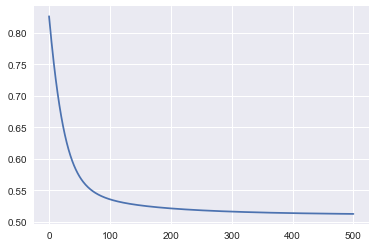

In [315]:
plt.plot( range(iter_num), all_costs )

In [324]:
iter_num=1501
alpha = 0.01
all_costs=grad_desc(alpha, iter_num)

Initial guess of b and w:  0.08071865178329252 [ 0.66255709  0.39587627  0.64127637  0.37751497  0.01954834  0.84604423
  0.47944341  0.20519636  0.99610836]
iteration:[ 0 ]:   - [Cost: ] 0.8828148239978085
iteration:[ 500 ]:   - [Cost: ] 0.5608259520240721
iteration:[ 1000 ]:   - [Cost: ] 0.5256646830254356
iteration:[ 1500 ]:   - [Cost: ] 0.5175862614274807


Final estimates of b and w:  -0.9990130203210792 [ 0.19003582  0.40832534  0.37842629 -0.03012643  0.28388148 -0.05740096
  0.01706043  0.48043773  0.66710864]


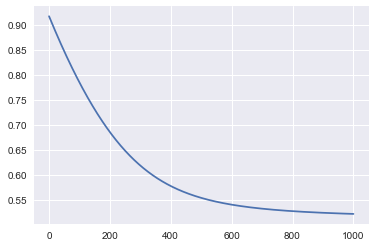

In [318]:
plt.plot( range(iter_num), all_costs )

In [325]:
iter_num=17001
alpha = 0.001
all_costs=grad_desc(alpha,iter_num)

Initial guess of b and w:  0.5642028179698375 [ 0.8168001   0.53990355  0.35229589  0.10474486  0.44592911  0.90653501
  0.62464046  0.19850695  0.6362158 ]
iteration:[ 0 ]:   - [Cost: ] 0.9446400691149026
iteration:[ 500 ]:   - [Cost: ] 0.8805562723715515
iteration:[ 1000 ]:   - [Cost: ] 0.8239062596311669
iteration:[ 1500 ]:   - [Cost: ] 0.7745350262197778
iteration:[ 2000 ]:   - [Cost: ] 0.7321138081033971
iteration:[ 2500 ]:   - [Cost: ] 0.6961594718884835
iteration:[ 3000 ]:   - [Cost: ] 0.6660671276277641
iteration:[ 3500 ]:   - [Cost: ] 0.6411531821892525
iteration:[ 4000 ]:   - [Cost: ] 0.6207031340476206
iteration:[ 4500 ]:   - [Cost: ] 0.604016646424167
iteration:[ 5000 ]:   - [Cost: ] 0.590443341032562
iteration:[ 5500 ]:   - [Cost: ] 0.5794058547588442
iteration:[ 6000 ]:   - [Cost: ] 0.5704102230602704
iteration:[ 6500 ]:   - [Cost: ] 0.5630460962523826
iteration:[ 7000 ]:   - [Cost: ] 0.5569802245478784
iteration:[ 7500 ]:   - [Cost: ] 0.5519464295584985
iteration:[ 8000 

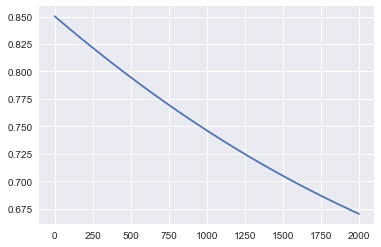

In [306]:
plt.plot( range(iter_num), all_costs )

### Use sklearn logistic regression API and compare the estimation of beta values.

In [307]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [308]:
logreg.intercept_

array([-1.2048952])

In [292]:
logreg.coef_

array([[ 0.13182113,  0.35923988,  0.35543757,  0.14086404,  0.37723974,
        -0.25355897,  0.00442196,  0.64515766,  0.8521594 ]])